In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
sns.set_palette("pastel")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [3]:
df = pd.read_csv('Datasets/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [7]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [8]:
df.loc[:, 'quality'] = df['quality'].map(quality_mapping)

In [9]:
df['quality'].value_counts().sort_index()

quality
0     10
1     53
2    681
3    638
4    199
5     18
Name: count, dtype: int64

In [10]:
df.shape

(1599, 12)

In [11]:
# use sample with frac=1 to shuffle the dataframe 
# we reset the indices since they change after 
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df_train = df.head(1000)
df_test = df.head(599)

In [13]:
# train a decision tree model for this
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [14]:
clf = DecisionTreeClassifier(max_depth=7)

In [15]:
cols = ['fixed acidity',  
'volatile acidity',  
'citric acid', 
'residual sugar', 
'chlorides', 
'free sulfur dioxide', 
'total sulfur dioxide', 
'density', 
'pH', 
'sulphates', 
'alcohol'] 

In [16]:
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=7)

In [17]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set 
test_predictions = clf.predict(df_test[cols])

In [18]:
# calculate the accuracy of predictions on 
# training data set
train_accuracy = accuracy_score(df_train['quality'], train_predictions)

# calculate the accuracy of predictions on 
# test data set
test_accuracy = accuracy_score(df_test['quality'], test_predictions)

In [19]:
print(train_accuracy)
print(test_accuracy)

0.783
0.7746243739565943


In [20]:
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

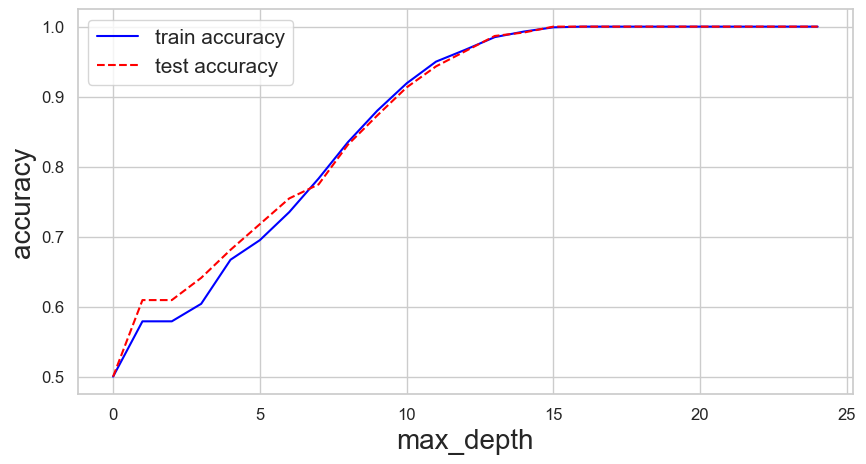

In [21]:
# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    clf = DecisionTreeClassifier(max_depth=depth) 
    # columns/features for training 
    # note that, this can be done outside  
    # the loop 
    cols = [ 
    'fixed acidity',  
    'volatile acidity', 
    'citric acid',  
    'residual sugar', 
    'chlorides', 
    'free sulfur dioxide',  
    'total sulfur dioxide', 
    'density', 
    'pH',  
    'sulphates', 
    'alcohol' 
    ] 
    # fit the model on given features 
    clf.fit(df_train[cols], df_train.quality) 
    
    # create training & test predictions 
    train_predictions = clf.predict(df_train[cols]) 
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies 
    train_accuracy = accuracy_score( 
    df_train.quality, train_predictions 
    ) 
    test_accuracy = accuracy_score( 
    df_test.quality, test_predictions 
    ) 
    
    # append accuracies 
    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)  
    
# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5))

# Plot train accuracy with a specific color and solid line
plt.plot(train_accuracies, label="train accuracy", color='blue', linestyle='-')

# Plot test accuracy with a different color and dashed line
plt.plot(test_accuracies, label="test accuracy", color='red', linestyle='--')

# Adding legend, labels, and ticks
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)

# Show the plot
plt.show()

In [22]:
from sklearn.model_selection import KFold

In [ ]:
if __name__ == '__main__':
    # Training data is in a csv file called train.csv
    df = pd.read_csv('train.csv')
    
    # We create a new column called kfold and fill it with -1
    df['kfold'] = -1
    
    # The next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop = True)
    
    # initiate the kfold class
    # This means the data will be divided into 5 folds for cross-validation.
    kf = KFold(n_splits=5)
    
    # fill the new kfold column
    
    for fold, (train_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    df.to_csv('train_folds.csv', index = False)

1. **Data Loading:**
   - `df = pd.read_csv('train.csv')`:
     - Loads the training data from a CSV file into a pandas DataFrame (`df`).
     - `train.csv` is the dataset, which could have any set of features (columns) and samples (rows).

2. **Creating a new column:**
   - `df['kfold'] = -1`:
     - A new column `kfold` is created and initialized with `-1` for all rows. This will later be filled with fold numbers (0 to 4 for 5 folds).

3. **Shuffling the data:**
   - `df = df.sample(frac=1).reset_index(drop=True)`:
     - This shuffles the rows of the DataFrame randomly to ensure random distribution of the data across folds.
     - `frac=1` means take 100% of the data, and `reset_index(drop=True)` resets the index after shuffling.

4. **Setting up KFold Cross-Validation:**
   - `kf = KFold(n_splits=5)`:
     - This initializes the `KFold` class with 5 splits. This means the data will be divided into 5 folds for cross-validation.

5. **Filling fold numbers:**
   - `for fold, (train_, val_) in enumerate(kf.split(X=df))`:
     - The `kf.split(X=df)` splits the data into 5 folds. Each split provides the indices of the training set (`train_`) and validation set (`val_`).
     - The `enumerate` function assigns a fold number (`fold`) starting from 0 up to 4 (since `n_splits=5`).
     - `df.loc[val_, 'kfold'] = fold` assigns the fold number to the `kfold` column for the validation set indices.


In [23]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
if __name__ == '__main__':
    # Training data is in a csv file called train.csv
    df = pd.read_csv('train.csv')
    
    # We create a new column called kfold and fill it with -1
    df['kfold'] = -1
    
    # The next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop = True)
    
    # fetch targets 
    y = df.target.values
    
    # initiate the kfold class
    # This means the data will be divided into 5 folds for cross-validation.
    kf = StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    
    for fold, (train_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] = fold
    
    df.to_csv('train_folds.csv', index = False)

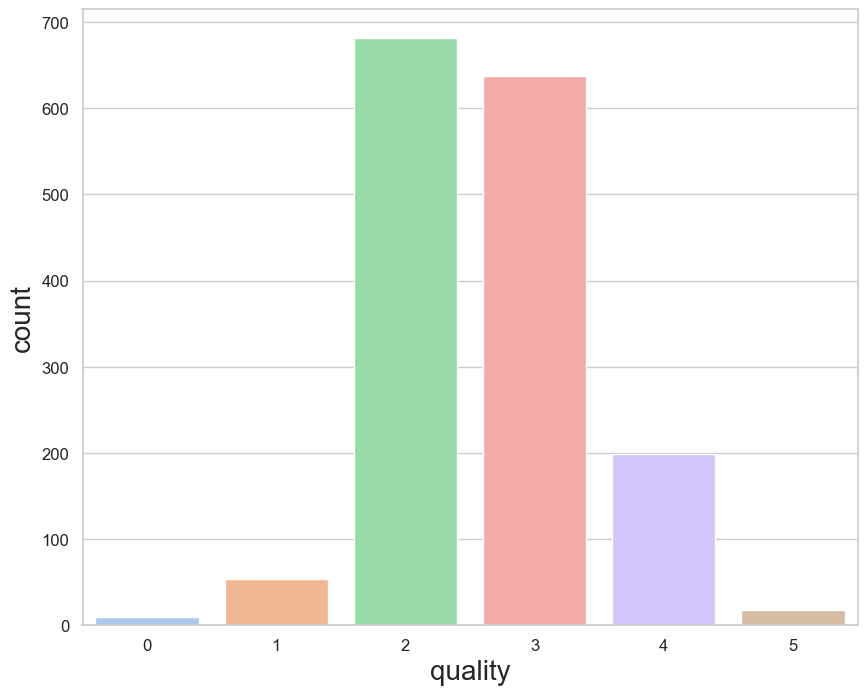

In [27]:
# let's check for wine dataset
plt.figure(figsize=(10, 8))
b = sns.countplot(x='quality', data = df)
b.set_xlabel("quality", fontsize=20) 
b.set_ylabel("count", fontsize=20) 
plt.show()

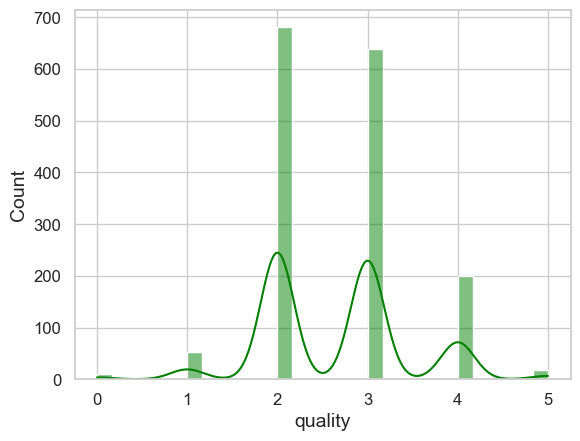

In [29]:
sns.histplot(df['quality'], kde=True, color = 'green')
plt.show()

## StratifiedKFold for regression model

In [30]:
def create_folds(data):
    data['kfold'] = -1
    
    data = data.sample(frac=1).reset_index(drop=True)
    
    # calculate the number of bins by Sturge's rule 
    # I take the floor of the value, you can also 
    # just round it 
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    data.loc[:, 'bins'] = pd.cut(
    data['target'], bins=num_bins, labels=False
    )
    kf = StratifiedKFold(n_splits=5)
    
    for f, (train_idx, val_idx) in enumerate(kf.split(X = data, y = data.bins.values)):
        data.loc[val_idx, 'kfold'] = f
    
    data = data.drop('bins', axis = 1)
    return data